In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the phyllosilicate informtion
postSerpentineSamples=pd.read_excel("G:/Serpentine Post 2000.xlsx",sheet_name="Serpentine")
postSerpentineSamples.head()

,Sample Name,Mineral,Strongest Mg-Oh,Unnamed: 3,Unnamed: 4,OH,Unnamed: 6,Unnamed: 7,Secondary Combination bands,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Clinochrysotile 22,Clinochrysotile,4316.0,4302.0,4278.0,3691.0,NaN,3651.0,4212.0,4205.0,4171.0,4129.0,4107.0,4080.0,NaN,NaN
1,Clinochrysotile 23,Clinochrysotile,4315.0,4301.0,4277.0,3694.0,NaN,3650.0,NaN,4200.0,4162.0,4117.0,NaN,4033.0,3980.0,3874.0
2,Clinochrysotile 95,Clinochrysotile,4315.0,4300.0,4278.0,3696.0,3686.0,3647.0,4217.0,4206.0,4176.0,4110.0,4095.0,4032.0,3987.0,3914.0
3,Clinochrysotile 96,Clinochrysotile,NaN,4301.0,4281.0,3692.0,3685.0,3651.0,4211.0,NaN,4165.0,4133.0,4102.0,4049.0,3984.0,3910.0
4,Lizardite 11,Lizardite,NaN,4303.0,4279.0,3692.0,3685.0,3653.0,NaN,4197.0,NaN,NaN,4098.0,4065.0,3985.0,3907.0


In [7]:
#define a class to hold Post 2000 samples
class PostSample:
    #create a constructor
    def __init__(self,sampleName,mineral,bandCentres):
        #set variable to hold sample name
        self.sampleName=sampleName
        #set variable to hold which mineral
        self.mineral=mineral
        #set variable to hold the bandCentres
        self.bandCentres=bandCentres

In [13]:
#create a list to hold all Post serpentine samples
allPostSerpentineSamples=[]
#iterate through serpentine dataframe and add samples to the list
for index, row in postSerpentineSamples.iterrows():
    #get the band centres
    bandCentres=[]
    for i in range(2,16):
        if row[i]==row[i]:#ensure the number is not NaN
            bandCentres.append(10000000/(row[i]*1000))
    #create an object
    currentSample=PostSample(row['Sample Name'],
                             row['Mineral '],
                             np.array(sorted(bandCentres)))
    #add the object to the list of samples
    allPostSerpentineSamples.append(currentSample)

In [23]:
#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47

#set bounds for the 2.5 band centre i.e the first band centre in the range 2.27-2.36
lowerBound25=2.47
upperBound25=2.67

#list to hold phyllosilicate samples that weren't plotted
nonPlottedPhyllosilicateSamples=[]
#list to hold phyllosilicate samples that were plotted
plottedPhyllosilicateSamples=[]

#lists to save band centres
postPhyllosilicate23BandCentre=[]
postPhyllosilicate25BandCentre=[]

for i in allPostSerpentineSamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        feature23Index=np.where(np.logical_and(bandCentres<=upperBound23,
                                                         bandCentres>=lowerBound23))[0][0]
        feature25Index=np.where(np.logical_and(bandCentres<=upperBound25,
                                                         bandCentres>=lowerBound25))[0][0]
        postPhyllosilicate23BandCentre.append(bandCentres[feature23Index])
        postPhyllosilicate25BandCentre.append(bandCentres[feature25Index])
        plottedPhyllosilicateSamples.append(i)
    except:
        nonPlottedPhyllosilicateSamples.append(i)

In [24]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples not plotted are:-\n\n")
for i in nonPlottedPhyllosilicateSamples:
    print(f"{i.sampleName}--\t\t\t\t--{i.mineral}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples not plotted are:-


Clinochrysotile 22--				--Clinochrysotile--				--[2.31696015 2.32450023 2.33754091 2.37416904 2.37812128 2.39750659
 2.42189392 2.4348673  2.45098039 2.70929287 2.73897562]


In [26]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples plotted are:-\n\n")
for i in plottedPhyllosilicateSamples:
    print(f"{i.sampleName}--\t\t\t\t--{i.mineral}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples plotted are:-


Clinochrysotile 23--				--Clinochrysotile--				--[2.3174971  2.32504069 2.33808744 2.38095238 2.40269101 2.42895312
 2.47954376 2.51256281 2.58131131 2.70709258 2.73972603]
Clinochrysotile 95--				--Clinochrysotile--				--[2.3174971  2.3255814  2.33754091 2.37135404 2.37755587 2.39463602
 2.43309002 2.44200244 2.48015873 2.50815149 2.55493102 2.70562771
 2.71296799 2.74197971]
Clinochrysotile 96--				--Clinochrysotile--				--[2.32504069 2.33590283 2.37473284 2.40096038 2.41954996 2.4378352
 2.46974562 2.51004016 2.55754476 2.70855905 2.71370421 2.73897562]
Lizardite 11--				--Lizardite--				--[2.32396003 2.33699462 2.38265428 2.44021474 2.4600246  2.50941029
 2.55950857 2.70855905 2.71370421 2.73747605]
Lizardite 51--				--Lizardite--				--[2.31696015 2.32396003 2.33535731 2.37868696 2.44678248 2.51635632
 2.5733402  2.7100271  2.7203482  2.73822563]
Lizardite-Orthochrysotile 42--				--Lizardite-Orthochrysotile--				--[2.3174971  2.32450023 2.3353

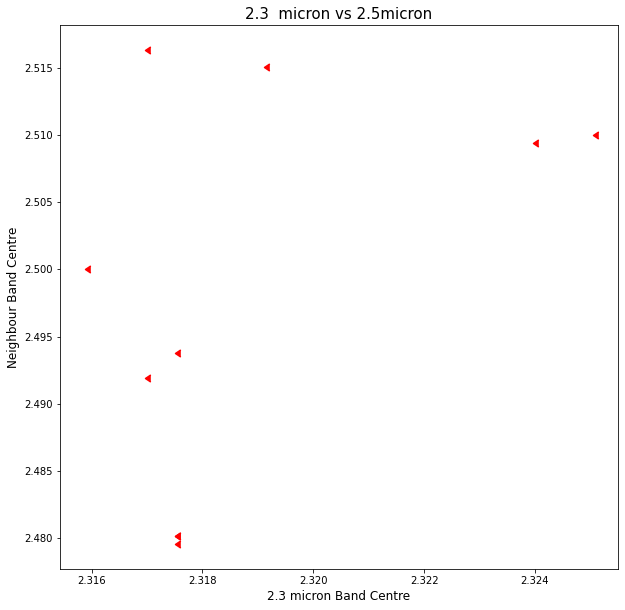

In [28]:
#create a figure and plot the four sets of points
plt.figure(figsize=(10,10))
plt.title("2.3  micron vs 2.5micron",fontsize=15)
plt.xlabel("2.3 micron Band Centre",fontsize=12)
plt.ylabel("Neighbour Band Centre",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plot the Post 2000 phyllosilicates
plt.scatter(postPhyllosilicate23BandCentre,
         postPhyllosilicate25BandCentre,
         s=50,
         color="Red",
         marker=4,
         label="Post 2000")